# Convolution Neural Network (Inclass - 10/Mar/2018)

In [2]:
import numpy as np
import keras
import tensorflow as tf
import imageio
import matplotlib.pyplot as plt
% matplotlib inline

/Users/amitkaps/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [29]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation

In [4]:
! wget http://bit.do/deepcheetah
! mv deepcheetah cheetah.jpg

/bin/sh: wget: command not found
mv: rename deepcheetah to cheetah.jpg: No such file or directory


### Convolution Layer

In [5]:
cheetah = imageio.imread("img/cheetah.jpg")
cheetah.shape

(426, 640, 3)

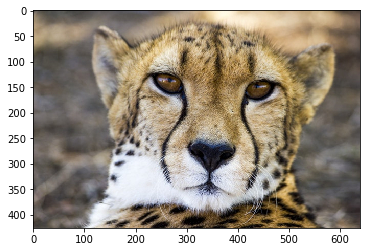

In [6]:
plt.imshow(cheetah)

In [7]:
model1 = Sequential()
model1.add(Conv2D(1, (2,2), padding="same", 
                  input_shape = cheetah.shape))

In [8]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 426, 640, 1)       13        
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [9]:
from helpers import visualise_conv

(426, 640, 3)
(426, 640)


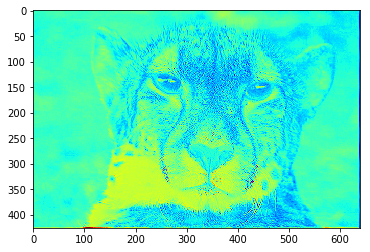

In [10]:
visualise_conv(cheetah, model1)

### With Convultion + Activation

In [11]:
model2 = Sequential()
model2.add(Conv2D(1, (2,2), padding="same", 
                  input_shape = cheetah.shape))
model2.add(Activation("relu"))

In [12]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 426, 640, 1)       13        
_________________________________________________________________
activation_1 (Activation)    (None, 426, 640, 1)       0         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


(426, 640, 3)
(426, 640)


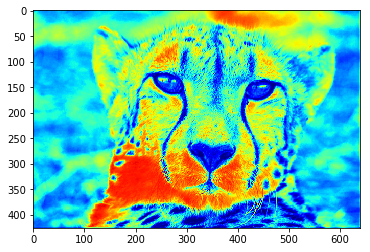

In [13]:
visualise_conv(cheetah, model2)

## With Convulution + Activation + Pooling

In [14]:
model3 = Sequential()
model3.add(Conv2D(1, (2,2), padding="same", 
                  input_shape = cheetah.shape))
model3.add(Activation("relu"))
model3.add(MaxPooling2D(pool_size=(16,16)))

(426, 640, 3)
(26, 40)


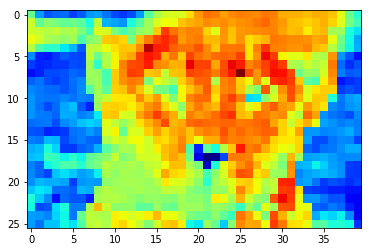

In [15]:
visualise_conv(cheetah, model3)

## Build a CNN

In [16]:
from keras.datasets import fashion_mnist
from helpers import fashion_mnist_label

In [17]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Steps 1: Preparing the images and labels

In [21]:
from keras import backend as K

In [22]:
K.image_data_format()

'channels_last'

In [23]:
x_train_conv = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_conv = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train_conv.shape, x_test_conv.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [24]:
# Normalise
x_train_conv = x_train_conv / 255
x_test_conv = x_test_conv / 255

In [26]:
# convert class vector to binary class matrices
y_train_class = keras.utils.to_categorical(y_train, 10)
y_test_class = keras.utils.to_categorical(y_test, 10)

### Step 2: Model - Convolution + Max Pooling + Dropouts

In [30]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape= (28,28,1)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [32]:
model.compile(loss="categorical_crossentropy",
             optimizer="sgd", metrics=["accuracy"])

In [33]:
%time
model.fit(x_train_conv, y_train_class, batch_size=128, 
          epochs=2, verbose=1,
         validation_data=(x_test_conv, y_test_class))

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 31 µs
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 200s 3ms/step - loss: 1.0998 - acc: 0.6118 - val_loss: 0.7050 - val_acc: 0.7462
Epoch 2/2
60000/60000 [==============================] - 192s 3ms/step - loss: 0.6913 - acc: 0.7458 - val_loss: 0.5870 - val_acc: 0.7879
